<h1>Exploring the Josephus Problem (in unnecessary detail)</h1>

I was curious about the Josephus Problem, so this is a notebook I made, experimenting with various "levels" of the Josephus problem - starting from very simple to getting more and more complicated.

In [30]:
using Plots
using DataFrames

include("JosephusFunctions.jl")     # Local module

using .JosephusFunctions

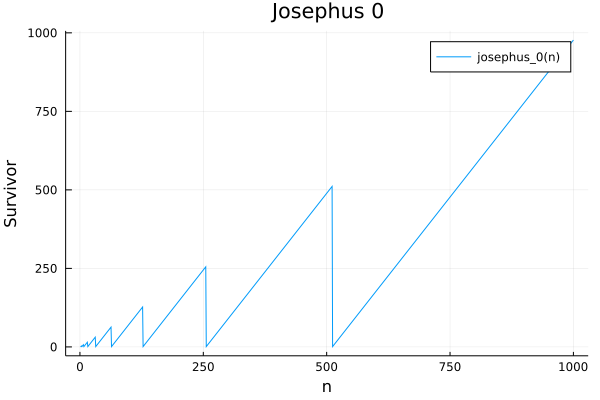

In [9]:
n = 1:1000
survivor = JosephusFunctions.josephus_0.(n)

plot(n, survivor, label="josephus_0(n)")
title!("Josephus 0")
xlabel!("n")
ylabel!("Survivor")

This was pretty interesting to see. It appears that there were spikes increasing in height, and when they reached the peak, they dropped straight down to 0. To investigate this further, I made a dataframe from 1 to 20, to see what was going on in greater detail, and when these spikes were happening.

In [10]:
DataFrame(n=n[1:20], survivor=survivor[1:20])

,n,survivor
,Int64,Int64
1,1,1
2,2,1
3,3,3
4,4,1
5,5,3
6,6,5
7,7,7
8,8,1
9,9,3


From the table, it can be observed that when <em>n</em> is a power of 2, the survivor is always 1, and otherwise the survivor is always increasing until it reaches the next power of 2, where it drops back to 1 again.

Next, I used josephus_0, which took in 2 parameters: *n* and *k*. *n* is the number of people in the circle (as it was previously), while *k* is the people killed next. For example, in josephus_0, *k* would have been 2. Again, I plotted this for *k* = 3 to see if there was a pattern. I predicted that if it was a power of 3, then the survivor would be 1, and otherwise there would be an increase of 3 - similar to what happened with josephus_0

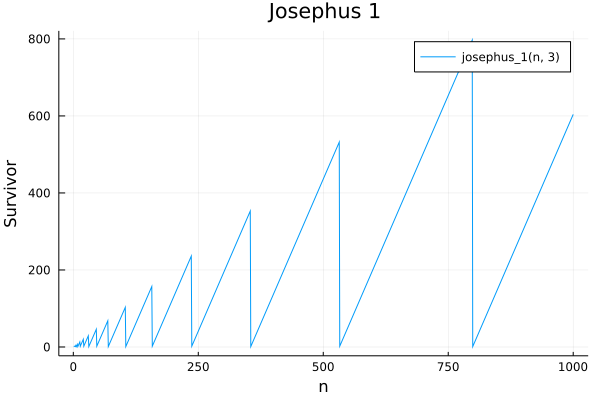

In [49]:
n = 1:1000
survivor = JosephusFunctions.josephus_1.(n, 3)

plot(n, survivor, label="josephus_1(n, 3)")
title!("Josephus 1")
xlabel!("n")
ylabel!("Survivor")

I was surprised at that result. On one hand, the results can be considered similar, with the rising linear spikes and the sudden drops to 1, however, the spikes arent happening at powers of 3, like I expected. Again, I made a dataframe to explore what was happening in more detail.

In [19]:
DataFrame(n=n[1:20], survivor=survivor[1:20])

,n,survivor
,Int64,Int64
1,1,1
2,2,2
3,3,2
4,4,1
5,5,4
6,6,1
7,7,4
8,8,7
9,9,1


It seemed more random, that although the next survivor was increasing by 3 each time, it would no longer drop to 1 each time. At *n* = 14, the pattern suddenly dropped to 2. However, this does actually make sense - 13 + 3 = 17 = 2 (mod 14). From this, we can change what we thought about what happened in josephus_0 (where *k*=2) The reason why the peaks were at powers of 2, was because the survivor was increasing by 2 as *n* increased by 2, and eventually, the survivor would surpass *n*, when *n* was at powers of 2, hence why *n* dropped back to 1.

For fun, I decided to plot graphs with higher values for k.

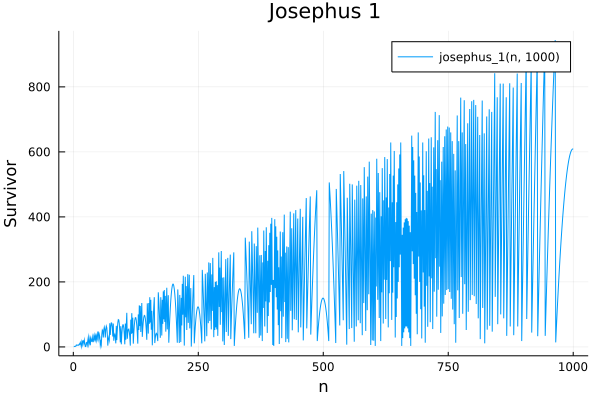

In [51]:
n = 1:1000
survivor = JosephusFunctions.josephus_1.(n, 1000)

plot(n, survivor, label="josephus_1(n, 1000)")
title!("Josephus 1")
xlabel!("n")
ylabel!("Survivor")

The pattern began to slowly ... disintegrate. There *was* still a pattern of some sort, with "W"s forming, and I thought taht was pretty cool. Of course since the ellimination is so much higher than the value for *n*, we can't see what happens in the future. It was why I decided to plot from 1000-10000, to see if the pattern became more regular.

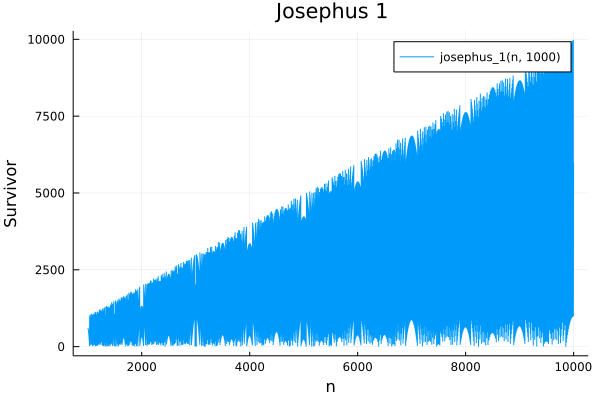

In [52]:
n = 1000:10000
survivor = JosephusFunctions.josephus_1.(n, 1000)

plot(n, survivor, label="josephus_1(n, 1000)")
title!("Josephus 1")
xlabel!("n")
ylabel!("Survivor")

That was the opposite of what I was expecting - I was expecting much larger differences. I decided to examine it more closely, by plotting from 1000 to 1500, to see what was happening on a lower level.

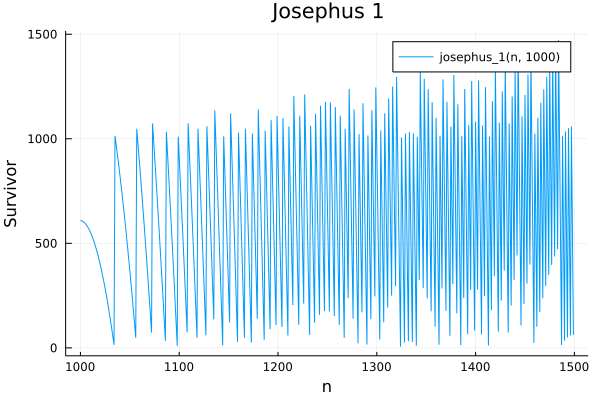

In [55]:
plot(n[1:500], survivor[1:500], label="josephus_1(n, 1000)")
title!("Josephus 1")
xlabel!("n")
ylabel!("Survivor")

The last survivor seemed to rapidly oscillate, with a much smaller distance between the spikes. This could be because as *k* is 1000, it would wrap around very quickly. It also seems to become more random.

Next, I wanted to see what would happen if there were multiple lives as well - that when the person killed the next person, they also had another live(s) remaining, and would only die once they go to 0 lives. My prediction is that it would be the same as doing *n* * *l* (where *n* is length of circle and *l* is the number of lives).

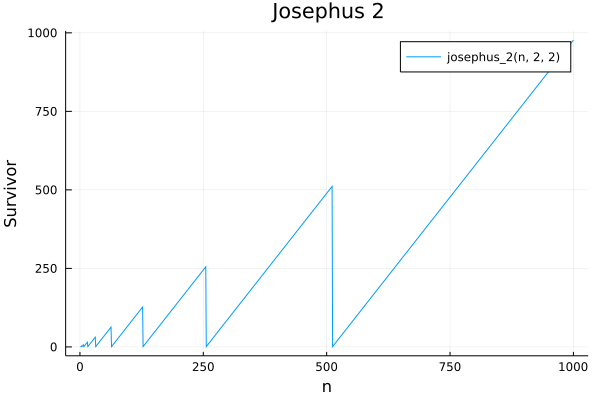

In [36]:
n = 1:1000
survivor = JosephusFunctions.josephus_2.(n, 2, 2)

plot(n, survivor, label="josephus_2(n, 2, 2)")
title!("Josephus 2")
xlabel!("n")
ylabel!("Survivor")

It turned out that with *k* = 2, the lives don't actually have an impact on the position of the survivor. This is because the next person to eliminate will just wrap around again (since it always starts with 1). So, instead I tried with 3.

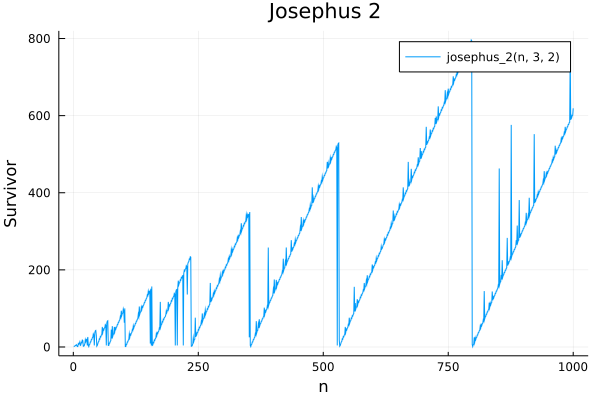

In [57]:
n = 1:1000
survivor = JosephusFunctions.josephus_2.(n, 3, 2)

plot(n, survivor, label="josephus_2(n, 3, 2)")
title!("Josephus 2")
xlabel!("n")
ylabel!("Survivor")

This graph looked particularly interesting. It wasn't too dissimilar from the graph for josephus(n, 3), but there seem to be 'ramdom' jumps, off of the trend. I tried to zoom in to see one such of these spikes, and what was happening in greater detail, with the josephus(n, 3) line also on it, to see the differences.

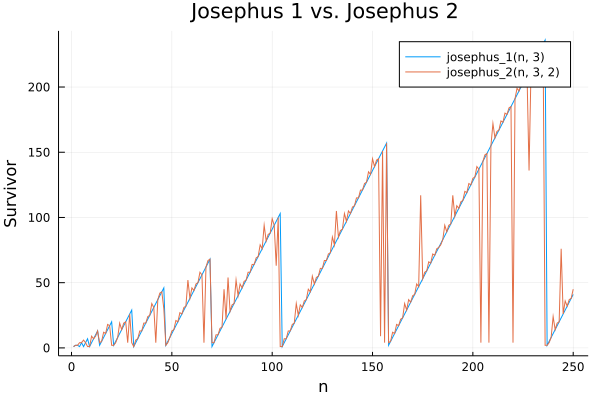

In [60]:
n = 1:250
survivor1 = JosephusFunctions.josephus_1.(n, 3)
survivor2 = JosephusFunctions.josephus_2.(n, 3, 2)

plot(n, [survivor1 survivor2], label=["josephus_1(n, 3)" "josephus_2(n, 3, 2)"])
title!("Josephus 1 vs. Josephus 2")
xlabel!("n")
ylabel!("Survivor")

As it can be seen, adding an extra life makes the graph seem to "break away" from the josephus_1(n, 3) graph. To examine this relationship (or lack therof) closer, a dataframe can be created.

In [62]:
DataFrame(n=n[1:20], survivor1=survivor1[1:20], survivor2=survivor2[1:20])

,n,survivor1,survivor2
,Int64,Int64,Int64
1,1,1,1
2,2,2,2
3,3,2,2
4,4,1,4
5,5,4,4
6,6,1,6
7,7,4,4
8,8,7,1
9,9,1,1


The extra life means that there is deviation from the normal, but usually it is not by much (when *n* = 8, the difference between josephus(n, 3), and josephus(n, 3, 2) seems like a lot, however it is not too different, since 9 = 1 (mod 8), and 9 - 7 = 2).

Next, I wanted to see what would happen if the lives were also increased as well. My hypothesis was that the "randomness" would increase even more, and the pattern would be even harder to explain.

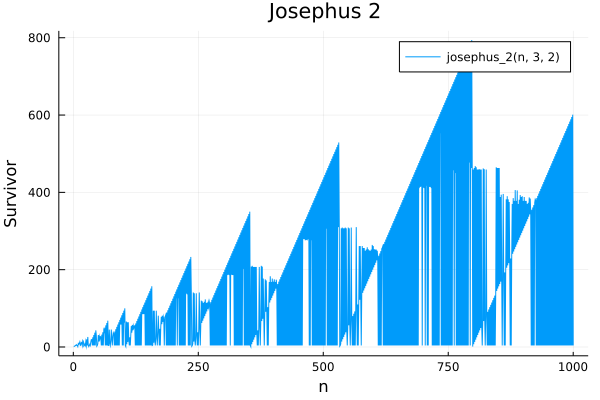

In [63]:
n = 1:1000
survivor = JosephusFunctions.josephus_2.(n, 3, 10)

plot(n, survivor, label="josephus_2(n, 3, 2)")
title!("Josephus 2")
xlabel!("n")
ylabel!("Survivor")

A pattern, once again did emerge. This time, there were very quick oscillations, as well as a weird plataeu that seemed to happened. Again, I plotted a smaller section (from 1 to 500 this time to get the plataeus) to see how it deviated from josephus(n, 3).

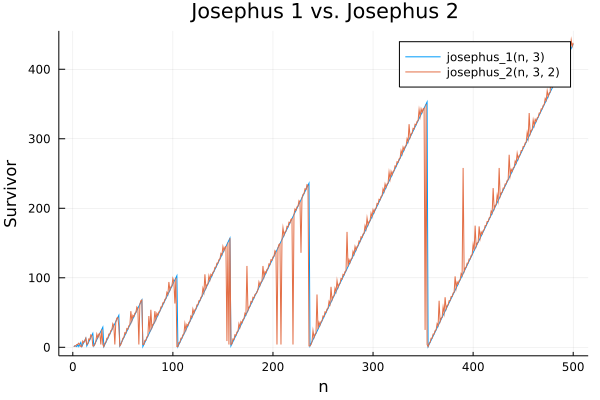

In [64]:
n = 1:500
survivor1 = JosephusFunctions.josephus_1.(n, 3)
survivor2 = JosephusFunctions.josephus_2.(n, 3, 10)

plot(n, [survivor1 survivor2], label=["josephus_1(n, 3)" "josephus_2(n, 3, 10)"])
title!("Josephus 1 vs. Josephus 2")
xlabel!("n")
ylabel!("Survivor")